In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


In [194]:
dataset = pd.read_csv('Sleep_Efficiency.csv')
dataset.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration (hrs)':'Sleep_duration ',"Sleep efficiency (%)":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption (ml)":"Caffeine_consumption",
                     "Alcohol consumption (days per week)":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency (days per week)":"Exercise_frequency"}, inplace = True)
#display(dataset)
dataset = dataset.dropna()
display(dataset)
dataset.drop(dataset.columns[[0,3,4]], axis=1, inplace=True)

display(dataset)


,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,16-11-2021 23:00,16-11-2021 06:30,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,13-11-2021 22:00,13-11-2021 05:30,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,31-03-2021 21:00,31-03-2021 03:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,451,45,Male,29-07-2021 21:00,29-07-2021 04:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


,Age,Gender,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
445,30,Female,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,27,Female,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,52,Male,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,45,Male,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [195]:
df = dataset.dropna()

display(df.shape)

display(df)

(388, 12)

,Age,Gender,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
445,30,Female,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,27,Female,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,52,Male,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,45,Male,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [196]:
'''cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Sleep_efficiency')) #Remove b from list
#cols.pop(cols.index('x')) #Remove x from list
df = df[cols+['Sleep_efficiency']] #Create new dataframe with columns in the order you want
display(df)
'''

"cols = list(df.columns.values) #Make a list of all of the columns in the df\ncols.pop(cols.index('Sleep_efficiency')) #Remove b from list\n#cols.pop(cols.index('x')) #Remove x from list\ndf = df[cols+['Sleep_efficiency']] #Create new dataframe with columns in the order you want\ndisplay(df)\n"

In [197]:
mapping = {'Male':0,'Female':1}
df = df.replace({'Gender':mapping})

mapping = {"Yes":1,'No':0}
df = df.replace({'Smoking_status':mapping})
display(df)

,Age,Gender,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,1,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,69,0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,40,1,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,1,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,57,0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
445,30,1,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
447,27,1,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,52,0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
450,45,0,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [198]:
TargetVariable=['Caffeiene_consumption']
column_names = list(df.columns.values)
Predictors=[]
#print(column_names)
for i in column_names:
    if (i!='Caffeiene_consumption'):
        Predictors.append(i)

print(Predictors) #all columns except Caffeiene_consumption
print(len(Predictors)) #11

X = df[Predictors].values
y = df[TargetVariable].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler() #z-score
TargetVarScaler=StandardScaler()


# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X) #standardization
y=TargetVarScalerFit.transform(y)


['Age', 'Gender', 'Sleep_duration ', 'Sleep_efficiency', 'Deep_sleep_percentage', 'Light_sleep_percentage', 'Awakenings', 'Caffeine_consumption', 'Alcohol_consumption', 'Smoking_status', 'Exercise_frequency']
11


In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [200]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(271, 11)
(271, 1)
(117, 11)
(117, 1)


In [201]:
!pip install tensorflow
!pip install keras

In [202]:
from keras.models import Sequential
from keras.layers import Dense


# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=11, input_dim=11, kernel_initializer='normal', activation='relu')) #11 columns
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=11, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 1.0275
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 1.0260
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 1.0250
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 1.0232
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 1.0204
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 1.0154
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 1.0080
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.9960
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.9794
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.9546
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.9227
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8821
Epoch 13/50
14/14 [==============================

In [203]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['Trial_no', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=11, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=11, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['Trial_no', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

4/4 [==============================] - 0s 4ms/step
1 Parameters: batch_size: 15 - epochs: 5 Accuracy: 96.16949537621224


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 15 - epochs: 10 Accuracy: 84.29736277116739


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 15 - epochs: 50 Accuracy: 82.92855617269527


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 15 - epochs: 100 Accuracy: 90.79872141681943


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 4ms/step
5 Parameters: batch_size: 20 - epochs: 5 Accuracy: 97.40861939061023


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 20 - epochs: 10 Accuracy: 100.21457982624494


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 20 - epochs: 50 Accuracy: 96.44768326490968


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 20 - epochs: 100 Accuracy: 89.04248972598347


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\3708770948.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<AxesSubplot:xlabel='Parameters'>

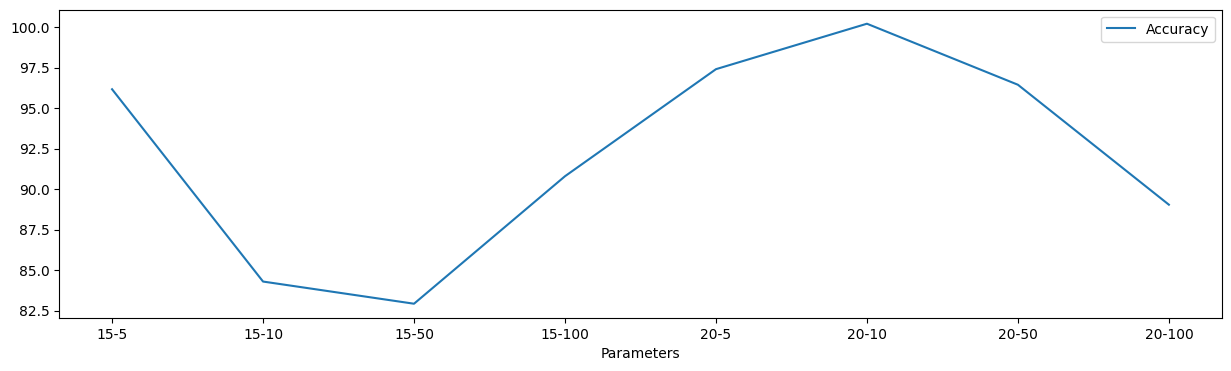

In [204]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [205]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)

rounded_pred = np.argmax(Predictions,axis=1)
display(rounded_pred)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['REM_sleep_percentage']=y_test_orig
TestingData['Predicted_REM_sleep_percentage']=Predictions
TestingData.head()

4/4 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

,Age,Gender,Sleep_duration,Sleep_efficiency,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency,REM_sleep_percentage,Predicted_REM_sleep_percentage
0,25.0,0.0,7.0,0.86,70.0,10.0,1.000000e+00,25.0,0.0,0.0,2.0,20.0,19.329788
1,16.0,1.0,8.5,0.65,35.0,47.0,2.000000e+00,0.0,0.0,0.0,0.0,18.0,18.301653
2,52.0,0.0,7.0,0.83,57.0,20.0,1.000000e+00,0.0,0.0,1.0,0.0,23.0,23.201321
3,37.0,1.0,7.0,0.81,55.0,20.0,1.000000e+00,0.0,5.0,0.0,4.0,25.0,25.446926
4,58.0,0.0,8.0,0.87,55.0,18.0,-2.220446e-16,0.0,3.0,1.0,3.0,27.0,26.594667


In [206]:
APE=100*(abs(TestingData['REM_sleep_percentage']-TestingData['Predicted_REM_sleep_percentage'])/TestingData['REM_sleep_percentage'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 97.43759251894708


,Age,Gender,Sleep_duration,Sleep_efficiency,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency,REM_sleep_percentage,Predicted_REM_sleep_percentage,APE
0,25.0,0.0,7.0,0.86,70.0,10.0,1.000000e+00,25.0,0.0,0.0,2.0,20.0,19.329788,3.351059
1,16.0,1.0,8.5,0.65,35.0,47.0,2.000000e+00,0.0,0.0,0.0,0.0,18.0,18.301653,1.675849
2,52.0,0.0,7.0,0.83,57.0,20.0,1.000000e+00,0.0,0.0,1.0,0.0,23.0,23.201321,0.875307
3,37.0,1.0,7.0,0.81,55.0,20.0,1.000000e+00,0.0,5.0,0.0,4.0,25.0,25.446926,1.787704
4,58.0,0.0,8.0,0.87,55.0,18.0,-2.220446e-16,0.0,3.0,1.0,3.0,27.0,26.594667,1.501232


In [207]:
#mean_prsp = df[]

In [208]:
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model
 
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
 
###########################################
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
 
#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
 
print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10


C:\Users\prana\AppData\Local\Temp\ipykernel_12224\1384300545.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel=KerasRegressor(make_regression_ann, verbose=0)


31/31 [==============================] - 1s 2ms/step - loss: 0.9676
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9662
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9640
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9576
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9427
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.9176
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.8778
Epoch 8/10
31/31 [==============================] - 0s 1ms/step - loss: 0.8350
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7907
Epoch 10/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7276
###################################################################### Accuracy: 95.031973308206
Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 1.0072
Epoch 2/10
31/31 [==========================

{'Optimizer_trial': 'rmsprop', 'batch_size': 30, 'epochs': 10}